Using Vgg19


question 1
**Loading vgg19**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications import VGG19

from keras import models
from keras import layers
from keras import optimizers

image_size = 32

In [ ]:
from keras.datasets import cifar10

num_classes = 10
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:

#Load the VGG model
vgg_conv = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer.name, layer.trainable)

80142336/80134624 [==============================] - 1s 0us/step
input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_conv4 False
block5_pool False


In [ ]:

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 20,559,946
Trainable params: 535,562
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=64,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 799s 1s/step - loss: 12.3335 - acc: 0.2921 - val_loss: 2.6256 - val_acc: 0.5336
Epoch 2/5
782/782 [==============================] - 780s 998ms/step - loss: 3.3496 - acc: 0.4409 - val_loss: 1.6119 - val_acc: 0.5345
Epoch 3/5
782/782 [==============================] - 780s 998ms/step - loss: 1.8386 - acc: 0.4879 - val_loss: 1.4452 - val_acc: 0.5560
Epoch 4/5
782/782 [==============================] - 778s 995ms/step - loss: 1.5709 - acc: 0.5253 - val_loss: 1.3865 - val_acc: 0.5734
Epoch 5/5
782/782 [==============================] - 793s 1s/step - loss: 1.4234 - acc: 0.5583 - val_loss: 1.3649 - val_acc: 0.5835


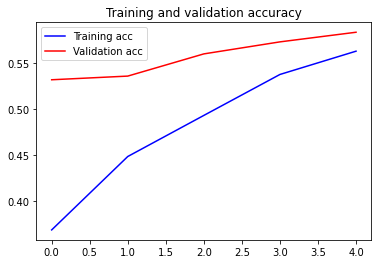

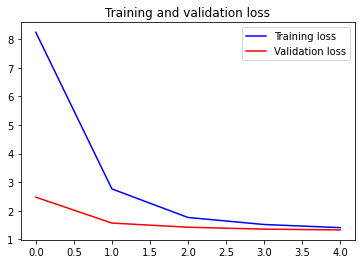

In [ ]:

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Question 2

In [ ]:
for i, layer in enumerate(vgg_conv.layers):
   print(i, layer.name)


0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool


In [ ]:

for layer in vgg_conv.layers[:20]:
   layer.trainable = False
for layer in vgg_conv.layers[20:]:
   layer.trainable = True
    

for layer in vgg_conv.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_conv4 True
block5_pool True


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 20,559,946
Trainable params: 2,895,370
Non-trainable params: 17,664,576
_________________________________________________________________


In [ ]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9),
              loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=64,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 11s 13ms/step - loss: 0.5311 - acc: 0.8111 - val_loss: 0.7498 - val_acc: 0.7561
Epoch 2/5
782/782 [==============================] - 10s 13ms/step - loss: 0.5090 - acc: 0.8180 - val_loss: 0.7502 - val_acc: 0.7576
Epoch 3/5
782/782 [==============================] - 10s 13ms/step - loss: 0.4793 - acc: 0.8277 - val_loss: 0.7554 - val_acc: 0.7576
Epoch 4/5
782/782 [==============================] - 10s 13ms/step - loss: 0.4641 - acc: 0.8321 - val_loss: 0.7531 - val_acc: 0.7590
Epoch 5/5
782/782 [==============================] - 10s 13ms/step - loss: 0.4494 - acc: 0.8376 - val_loss: 0.7588 - val_acc: 0.7596


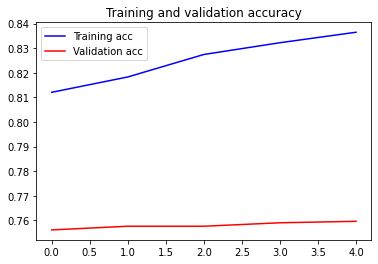

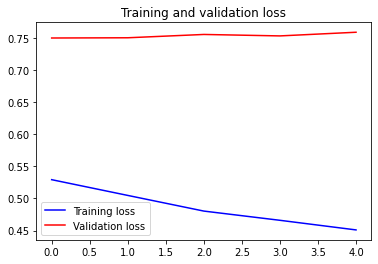

In [ ]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 3rd question



In [ ]:


model1 = models.Sequential()
model1.add(vgg_conv)
model1.add(layers.Flatten())
model1.add(layers.Dense(4096, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(num_classes, activation='softmax'))
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4096)              2101248   
_________________________________________________________________
dropout_6 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                40970     
Total params: 22,166,602
Trainable params: 4,502,026
Non-trainable params: 17,664,576
_________________________________________________________________


In [ ]:

for layer in vgg_conv.layers[:22]:
   layer.trainable = False
for layer in vgg_conv.layers[22:]:
   layer.trainable = True
    
for layer in vgg_conv.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_conv4 False
block5_pool False


In [ ]:
from keras.optimizers import SGD
model1.compile(optimizer=SGD(lr=0.0001, momentum=0.9),
              loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model1.fit(x_train, y_train,
              batch_size=64,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 10s 13ms/step - loss: 0.4188 - acc: 0.8609 - val_loss: 0.8682 - val_acc: 0.7540
Epoch 2/5
782/782 [==============================] - 10s 12ms/step - loss: 0.3972 - acc: 0.8691 - val_loss: 0.8815 - val_acc: 0.7535
Epoch 3/5
782/782 [==============================] - 10s 12ms/step - loss: 0.3965 - acc: 0.8685 - val_loss: 0.8906 - val_acc: 0.7530
Epoch 4/5
782/782 [==============================] - 10s 12ms/step - loss: 0.3901 - acc: 0.8695 - val_loss: 0.8963 - val_acc: 0.7526
Epoch 5/5
782/782 [==============================] - 10s 12ms/step - loss: 0.3914 - acc: 0.8679 - val_loss: 0.9014 - val_acc: 0.7539


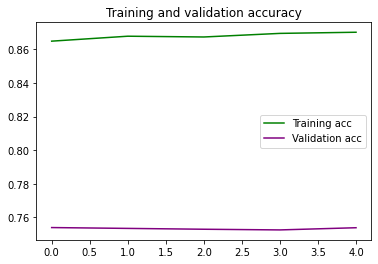

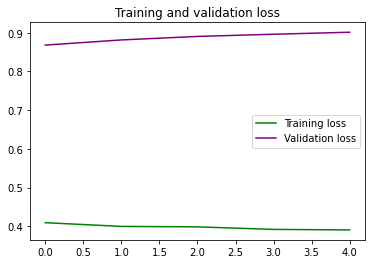

In [ ]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'purple', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'purple', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

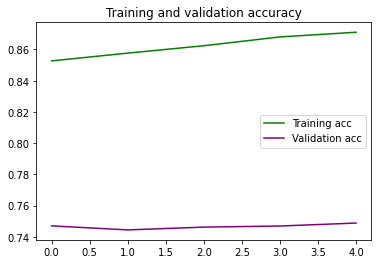

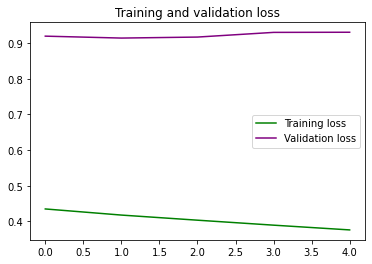

In [ ]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'purple', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'purple', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Question 4

In [ ]:
# Create the model
model2 = models.Sequential()
model2.add(vgg_conv)
model2.add(layers.Flatten())
model2.add(layers.Dense(4096, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(num_classes, activation='softmax'))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 4096)              2101248   
_________________________________________________________________
dropout_7 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                40970     
Total params: 22,166,602
Trainable params: 2,142,218
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
for layer in vgg_conv.layers[:20]:
   layer.trainable = False
for layer in vgg_conv.layers[20:]:
   layer.trainable = True
    
for layer in vgg_conv.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_conv4 True
block5_pool True


In [ ]:
from keras.optimizers import SGD
model2.compile(optimizer=SGD(lr=0.0001, momentum=0.9),
              loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model2.fit(x_train, y_train,
              batch_size=64,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 11s 14ms/step - loss: 0.8557 - acc: 0.7175 - val_loss: 0.8395 - val_acc: 0.7509
Epoch 2/5
782/782 [==============================] - 10s 13ms/step - loss: 0.4565 - acc: 0.8485 - val_loss: 0.8702 - val_acc: 0.7471
Epoch 3/5
782/782 [==============================] - 10s 13ms/step - loss: 0.4152 - acc: 0.8604 - val_loss: 0.8812 - val_acc: 0.7471
Epoch 4/5
782/782 [==============================] - 10s 13ms/step - loss: 0.3877 - acc: 0.8681 - val_loss: 0.9202 - val_acc: 0.7441
Epoch 5/5
782/782 [==============================] - 10s 13ms/step - loss: 0.3779 - acc: 0.8716 - val_loss: 0.9087 - val_acc: 0.7460


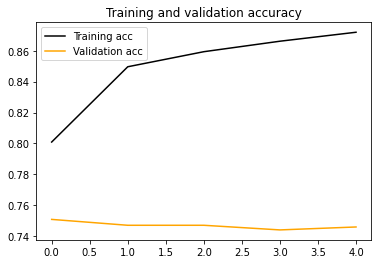

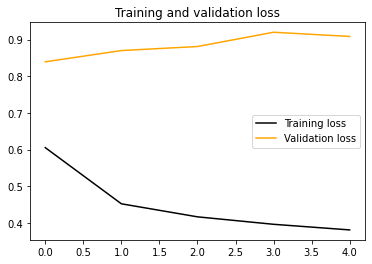

In [ ]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'black', label='Training acc')
plt.plot(epochs, val_acc, 'orange', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'black', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Inference:
 When there are more convolution layers there will be more trainable parameters so epochs and training time should be high to get good accuracy. So when we freeze the convolution layers number of trainable parameters reduces thus improving the accuracy with same number of epochs.
 when we increase the parameters in Dense layer accuracy can be seen to improve

 Before freezing...
Accuracy = 55%
After freezing all layers except convo4...
Accuracy = 74%
Changing dense layer to 2048 and freezing all layers except convo4
Accuracy = 75%
unfreezing last convolutional layer and modified dense layer gives 90% accuracy a